In [16]:
import pandas as pd
import os 
import math
import statistics
import matplotlib.pylab as plt
import nltk
import numpy as np
import scipy.stats

In [17]:
#pip install nltk==3.3
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
#pip install pycountry
#pip install geograpy3
#pip install pycountry-convert
import pycountry
from geograpy import extraction
nltk.download('twitter_samples')
from nltk.corpus import twitter_samples
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
import re, string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import FreqDist
import country_converter as coco
from nltk import classify
from nltk import NaiveBayesClassifier
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from collections import Counter
import time

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michaelyao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/michaelyao/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/michaelyao/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/michaelyao/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/michaelyao/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michaelyao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagge

# Adding new columns to the datasets. The columns include the year of the video; the mean, median and particular percentiles of up_votes number in the year each video belong to; two indicators to indicate whether the video has more upvotes than the median/ 75 percentile upvotes of that year, which are used to classify the videos.

In [18]:
eluvio = pd.read_csv("Eluvio_DS_Challenge.csv") 

In [19]:
author_list = list(eluvio['author'])
dates = list(eluvio['date_created'])
titles = list(eluvio['title'])
votes = list(eluvio['up_votes'])

In [20]:
years = {}
for date in dates:
    year = date[:4]
    if year not in years:
        years[year] = 1
    else:
        years[year] = years[year]+1

In [21]:
year_index = {}
index = 0
for year in years:
    index = index+years[year]
    year_index[year] = index
year_index_dict = {
 '2008': [0,22505],
 '2009': [22505,47620],
 '2010': [47620,70933],
 '2011': [70933,109819],
 '2012': [109819,152462],
 '2013': [152462,240693],
 '2014': [240693,332723],
 '2015': [332723,427344],
 '2016': [427344,509236]
}
year_index_dict

{'2008': [0, 22505],
 '2009': [22505, 47620],
 '2010': [47620, 70933],
 '2011': [70933, 109819],
 '2012': [109819, 152462],
 '2013': [152462, 240693],
 '2014': [240693, 332723],
 '2015': [332723, 427344],
 '2016': [427344, 509236]}

In [22]:
year_col = []
for year in years:
    temp = [year]*years[year]
    year_col = year_col+temp

In [23]:
eluvio['year'] = year_col

In [24]:
median_dict = {}
mean_dict = {}
percentile75_dict = {}
percentile80_dict = {}
percentile85_dict = {}
percentile90_dict = {}
percentile95_dict = {}
for year_number in range(2008,2017):
    year = str(year_number)
    votes_this_year = votes[year_index_dict[year][0]:year_index_dict[year][1]]
    median_dict[year] = statistics.median(votes_this_year)
    mean_dict[year] = statistics.mean(votes_this_year)
    percentile75_dict[year] = np.percentile(votes_this_year,75)
    percentile80_dict[year] = np.percentile(votes_this_year,80)
    percentile85_dict[year] = np.percentile(votes_this_year,85)
    percentile90_dict[year] = np.percentile(votes_this_year,90)
    percentile95_dict[year] = np.percentile(votes_this_year,95)

In [25]:
median_col = []
mean_col = []
percentile75_col = []
percentile80_col = []
percentile85_col = []
percentile90_col = []
percentile95_col = []
for year in years:
    temp_median = [median_dict[year]]*years[year]
    temp_mean = [mean_dict[year]]*years[year]
    temp_75 = [percentile75_dict[year]]*years[year]
    temp_80 = [percentile80_dict[year]]*years[year]
    temp_85 = [percentile85_dict[year]]*years[year]
    temp_90 = [percentile90_dict[year]]*years[year]
    temp_95 = [percentile95_dict[year]]*years[year]
    median_col = median_col+temp_median
    mean_col = mean_col+temp_mean
    percentile75_col = percentile75_col+temp_75
    percentile80_col = percentile80_col+temp_80
    percentile85_col = percentile85_col+temp_85
    percentile90_col = percentile90_col+temp_90
    percentile95_col = percentile95_col+temp_95

In [26]:
eluvio['median_this_year'] = median_col
eluvio['mean_this_year'] = mean_col
eluvio['percentile75_year'] = percentile75_col
eluvio['percentile80_year'] = percentile80_col
eluvio['percentile85_year'] = percentile85_col
eluvio['percentile90_year'] = percentile90_col
eluvio['percentile95_year'] = percentile95_col

In [27]:
indi = []
for i in range(len(votes)):
    if votes[i] > median_col[i]:
        indi.append(1)
    else:
        indi.append(0)
eluvio['greater_than_median'] = indi

In [28]:
indi = []
for i in range(len(votes)):
    if votes[i] > percentile75_col[i]:
        indi.append(1)
    else:
        indi.append(0)
eluvio['greater_than_75'] = indi

In [29]:
eluvio

,time_created,date_created,up_votes,down_votes,title,over_18,author,category,year,median_this_year,mean_this_year,percentile75_year,percentile80_year,percentile85_year,percentile90_year,percentile95_year,greater_than_median,greater_than_75
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews,2008,1.0,15.823906,5.0,7.0,10.0,18.0,63.00,1,0
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews,2008,1.0,15.823906,5.0,7.0,10.0,18.0,63.00,1,0
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews,2008,1.0,15.823906,5.0,7.0,10.0,18.0,63.00,1,0
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews,2008,1.0,15.823906,5.0,7.0,10.0,18.0,63.00,0,0
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews,2008,1.0,15.823906,5.0,7.0,10.0,18.0,63.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509231,1479816764,2016-11-22,5,0,Heil Trump : Donald Trump s alt-right white...,False,nonamenoglory,worldnews,2016,5.0,182.005654,19.0,29.0,55.0,170.9,747.45,0,0
509232,1479816772,2016-11-22,1,0,There are people speculating that this could b...,False,SummerRay,worldnews,2016,5.0,182.005654,19.0,29.0,55.0,170.9,747.45,0,0
509233,1479817056,2016-11-22,1,0,Professor receives Arab Researchers Award,False,AUSharjah,worldnews,2016,5.0,182.005654,19.0,29.0,55.0,170.9,747.45,0,0
509234,1479817157,2016-11-22,1,0,Nigel Farage attacks response to Trump ambassa...,False,smilyflower,worldnews,2016,5.0,182.005654,19.0,29.0,55.0,170.9,747.45,0,0


# Data exploratory

In [30]:
#check the relation between up_votes and time

In [31]:
month_list = ['01','02','03','04','05','06','07','08','09','10','11','12']

In [32]:
vote_by_month = {}
for year in range(2008,2016):
    if year == 2008:
        votes_this_year = votes[0:year_index['2008']]
        dates_this_year = dates[0:year_index['2008']]
    else:
        votes_this_year = votes[year_index[str(year-1)]:year_index[str(year)]]
        dates_this_year = dates[year_index[str(year-1)]:year_index[str(year)]]
    month_this_year = []
    for i in range(len(dates_this_year)):
        month_this_year.append(dates_this_year[i][5:7])
    month_this_year_index = []  
    for month in month_list:
        month_this_year_index.append(month_this_year.index(month))
    for i in range(len(month_list)):
        if i<11:
            vote_by_month[str(year)+'-'+month_list[i]] = statistics.mean(votes_this_year[month_this_year_index[i]:month_this_year_index[i+1]])
        else:
            vote_by_month[str(year)+'-'+month_list[i]] = statistics.mean(votes_this_year[month_this_year_index[i]:len(votes_this_year)])
            

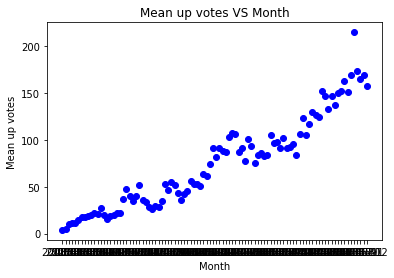

In [33]:
plt.plot(*zip(*sorted(vote_by_month.items())), 'bo')
plt.xlabel('Month')
plt.ylabel('Mean up votes')
plt.title("Mean up votes VS Month")
plt.show()

In [34]:
#The results shows that the up_votes of videos increases significantly with time, 
#therefore we need to consider about the posted year of the video in our prediction model

In [35]:
#check the relation between up_votes and author

In [36]:
dict_author_indexes = {}
for i in range(len(author_list)):
    if author_list[i] not in dict_author_indexes:
        dict_author_indexes[author_list[i]] = [i]
    else:
        dict_author_indexes[author_list[i]].append(i)
dict_author_number = {}
for author in author_list:
    if author not in dict_author_number:
        dict_author_number[author] = 1
    else:
        dict_author_number[author] = dict_author_number[author]+1

In [37]:
dict_author_vote = {}
for author in dict_author_indexes:
    his_votes = []
    for index in dict_author_indexes[author]:
        his_votes.append(votes[index])
    dict_author_vote[author] = his_votes

In [38]:
number_list = []
median_list = []
mean_list = []
for author in dict_author_indexes:
    number_list.append(len(dict_author_vote[author]))
    median_list.append(statistics.median(dict_author_vote[author]))
    mean_list.append(statistics.mean(dict_author_vote[author]))

In [39]:
corr, p_value = scipy.stats.pearsonr(number_list, median_list)
print('The correlation between the median upvotes number and the number of posted video for an author is: '+ str(corr))
corr, p_value = scipy.stats.pearsonr(number_list, mean_list)
print('The correlation between the mean upvotes number and the number of posted video for an author is: '+ str(corr))


The correlation between the median upvotes number and the number of posted video for an author is: -0.013832341806825195
The correlation between the mean upvotes number and the number of posted video for an author is: -0.002423070043245237


In [40]:
#The results shows very week correlations between up_votes of videos and the author, 
#therefore we don't need to consider about the author of the video in our prediction model

# Train a model to predict whether a video has more upvotes than at 75% of the videos in that year, using the lemmatized tokens in the titles as features, implementing Naive Bayes classifier

In [41]:
#The function to tokenize, lemmatize and remove noise for each video title. 
#The returened list contains the extracted key words for each input title.
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        token = re.sub("'s","", token)
        token = re.sub("‘","", token)
        token = re.sub("’","", token)
        token = re.sub("”","", token)
        token = re.sub("-","", token)
        token = re.sub("–","", token)
        token = re.sub("--","", token)
        token_u = (token.encode('unicode-escape')).decode("utf-8", "strict")
        if r'\u200b' in token_u:
            token = token_u.split('\\u200b')[1]
        if token.isnumeric():
            token = re.sub(token,"", token)
        if 'http' in token or 'http' in token or 'html' in token or 'www.' in token:
            token = re.sub(token,"", token)
        if token == 'us':
            token = re.sub(token,"", token)
            

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words and token.lower() != "say":
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

In [42]:
stop_words = stopwords.words('english')

In [43]:
#classify the video to two sets: 
#with more upvotes than 75% of the video in its year; with less or equal upvotes than 75% of the video in its year
df_positive = eluvio[eluvio['greater_than_75']==1]
df_negative = eluvio[eluvio['greater_than_75']==0]

In [44]:
pos_titles = list(df_positive['title'])
neg_titles = list(df_negative['title'])

In [45]:
positive_cleaned_tokens_list = []
for i in range(0,len(pos_titles)):
    the_title = nltk.word_tokenize(pos_titles[i])
    positive_cleaned_tokens_list.append(remove_noise(the_title, stop_words))
positive_cleaned_tokens_list = positive_cleaned_tokens_list.copy()

In [46]:
negative_cleaned_tokens_list = []
for i in range(0,len(neg_titles)):
    the_title = nltk.word_tokenize(neg_titles[i])
    negative_cleaned_tokens_list.append(remove_noise(the_title, stop_words))
negative_cleaned_tokens_list = negative_cleaned_tokens_list.copy()

In [47]:
cleaned_tokens_list = []
for i in range(0,len(titles)):
    the_title = nltk.word_tokenize(titles[i])
    cleaned_tokens_list.append(remove_noise(the_title, stop_words))
cleaned_tokens_list = cleaned_tokens_list.copy()

In [48]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

In [49]:
all_words = get_all_words(cleaned_tokens_list)
freq_dist = FreqDist(all_words)

In [67]:
#list(freq_dist.keys())
#list(freq_dist.values())
#print(freq_dist.most_common(20000))

In [50]:
#only keep the words appear more than 10 times in the entire datasets as the features
common_words = []
for i in range(len(list(freq_dist.keys()))):
    if list(freq_dist.values())[i] > 10:
        common_words.append(list(freq_dist.keys())[i])

In [51]:
len(common_words)

19887

In [52]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [53]:
positive_cleaned_tokens_list_use = []
for i in range(len(positive_cleaned_tokens_list)):
    positive_cleaned_tokens_list_use.append(intersection(positive_cleaned_tokens_list[i],common_words))

In [54]:
negative_cleaned_tokens_list_use = []
for i in range(len(negative_cleaned_tokens_list)):
    negative_cleaned_tokens_list_use.append(intersection(negative_cleaned_tokens_list[i],common_words))

In [78]:
def prepare_for_model(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tokens)

In [94]:
positive_tokens_for_model = prepare_for_model(positive_cleaned_tokens_list_use)
negative_tokens_for_model = prepare_for_model(negative_cleaned_tokens_list_use)

In [95]:
positive_dataset = [(dic, "Positive")
                     for dic in positive_tokens_for_model]

negative_dataset = [(dic, "Negative")
                     for dic in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

In [96]:
#randomly split the data into 90% training set and 10% test set
import random
random.shuffle(dataset)

train_data = dataset[:int(len(titles)*0.9)]
test_data = dataset[int(len(titles)*0.9):]

In [97]:
from nltk import classify
from nltk import NaiveBayesClassifier

In [98]:
#use naive Bayes to train the model, the accuracy is about 58% for most of the tests
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.580924514963475
Most Informative Features
          neonicotinoids = True           Positi : Negati =     21.5 : 1.0
               falkvinge = True           Positi : Negati =     17.8 : 1.0
             enslavement = True           Positi : Negati =     17.8 : 1.0
            unvaccinated = True           Positi : Negati =     16.6 : 1.0
                itartass = True           Negati : Positi =     15.7 : 1.0
                covertly = True           Positi : Negati =     15.4 : 1.0
                    mpaa = True           Positi : Negati =     13.6 : 1.0
                    teem = True           Positi : Negati =     12.9 : 1.0
                 presstv = True           Negati : Positi =     12.7 : 1.0
                  stored = True           Positi : Negati =     11.7 : 1.0
None


# To check which countries are mentioned in which titles and to compare which countries are mentioned more frequently, I built a list of country name/ nationality name keywords to extract the countries correctly. For the countries US and UK, the extraction involves additional procedures.

In [55]:
long_countries = []
short_countries = []
for country in pycountry.countries:
    if ' ' in country.name:
        long_countries.append(country.name)
    else:
        short_countries.append(country.name)

In [56]:
NATIONALITIES_list = ['Afghan', 'Albanian', 'Algerian', 'American', 'Andorran', 'Angolan', 'Antiguans', 'Argentinean', 'Armenian', 'Australian', 'Austrian', 'Azerbaijani', 'Bahamian', 'Bahraini', 'Bangladeshi', 'Barbadian', 'Barbudans', 'Batswana', 'Belarusian', 'Belgian', 'Belizean', 'Beninese', 'Bhutanese', 'Bolivian', 'Bosnian', 'Brazilian', 'British', 'Bruneian', 'Bulgarian', 'Burkinabe', 'Burmese', 'Burundian', 'Cambodian', 'Cameroonian', 'Canadian', 'Cape Verdean', 'Central African', 'Chadian', 'Chilean', 'Chinese', 'Colombian', 'Comoran',  'Congolese', 'Costa Rican', 'Croatian', 'Cuban', 'Cypriot', 'Czech', 'Danish', 'Djibouti', 'Dominican', 'Dutch', 'Dutchman', 'Dutchwoman', 'East Timorese', 'Ecuadorean', 'Egyptian', 'Emirian', 'Equatorial Guinean', 'Eritrean', 'Estonian', 'Ethiopian', 'Fijian', 'Filipino', 'Finnish', 'French', 'Gabonese', 'Gambian', 'Georgian', 'German', 'Ghanaian', 'Greek', 'Grenadian', 'Guatemalan', 'Guinea-Bissauan', 'Guinean', 'Guyanese', 'Haitian', 'Herzegovinian', 'Honduran', 'Hungarian', 'I-Kiribati', 'Icelander', 'Indian', 'Indonesian', 'Iranian', 'Iraqi', 'Irish', 'Israeli', 'Italian', 'Ivorian', 'Jamaican', 'Japanese', 'Jordanian', 'Kazakhstani', 'Kenyan', 'Kittian and Nevisian', 'Kuwaiti', 'Kyrgyz', 'Laotian', 'Latvian', 'Lebanese', 'Liberian', 'Libyan', 'Liechtensteiner', 'Lithuanian', 'Luxembourger', 'Macedonian', 'Malagasy', 'Malawian', 'Malaysian', 'Maldivan', 'Malian', 'Maltese', 'Marshallese', 'Mauritanian', 'Mauritian', 'Mexican', 'Micronesian', 'Moldovan', 'Monacan', 'Mongolian', 'Moroccan', 'Mosotho', 'Motswana', 'Mozambican', 'Namibian', 'Nauruan', 'Nepalese', 'Netherlander', 'New Zealander', 'Ni-Vanuatu', 'Nicaraguan', 'Nigerian', 'Nigerien', 'North Korean', 'Northern Irish', 'Norwegian', 'Omani', 'Pakistani', 'Palauan', 'Panamanian', 'Papua New Guinean', 'Paraguayan', 'Peruvian', 'Polish', 'Portuguese', 'Qatari', 'Romanian', 'Russian', 'Rwandan', 'Saint Lucian', 'Salvadoran', 'Samoan', 'San Marinese', 'Sao Tomean', 'Saudi', 'Scottish', 'Senegalese', 'Serbian', 'Seychellois', 'Sierra Leonean', 'Singaporean', 'Slovakian', 'Slovenian', 'Solomon Islander', 'Somali', 'South African', 'South Korean', 'Spanish', 'Sri Lankan', 'Sudanese', 'Surinamer', 'Swazi', 'Swedish', 'Swiss', 'Syrian', 'Taiwanese', 'Tajik', 'Tanzanian', 'Thai', 'Togolese', 'Tongan', 'Trinidadian or Tobagonian', 'Tunisian', 'Turkish', 'Tuvaluan', 'Ugandan', 'Ukrainian', 'Uruguayan', 'Uzbekistani', 'Venezuelan', 'Vietnamese', 'Welsh', 'Yemenite', 'Zambian', 'Zimbabwean']


In [57]:
import country_converter as coco
standard_names = coco.convert(names=long_countries, to='name_short')
same_after_coco = []
diff_after_coco = []
diff_after_coco_long = []
for i in range(len(standard_names)):
    if standard_names[i] == long_countries[i]:
        same_after_coco.append(standard_names[i])
    else:
        diff_after_coco.append(standard_names[i])
        diff_after_coco_long.append(long_countries[i])

In [58]:
countries = []
for country in short_countries:
    country_l = [country]
    for nationality in NATIONALITIES_list:
        if country[:4] == nationality[:4]:
            country_l.append(nationality)
    countries.append(country_l)
countries[9] = ['Australia', 'Australian']
countries[10] = ['Austria', 'Austrian']
countries[23] = ['Switzerland', 'Swiss']
countries[27] = ['Barbados', 'Barbadian']
countries[41] = ['Denmark', 'Danish']
countries[46] = ['Spain', 'Spanish']
countries[49] =  ['Finland', 'Finnish']
countries[51] =  ['France', 'French']
countries[57] =   ['Guinea', 'Guinean']
countries[60] =   ['Guinea-Bissau', 'Guinea-Bissauan']
countries[73] =   ['Ireland','Irish']
countries[96] =  ['Macao', 'Macau']
countries[108] =  ['Mauritania', 'Mauritanian']
countries[111] =  ['Mauritius', 'Mauritian']
countries[112] =  ['Malawi', 'Malawian']
countries[113] =  ['Malaysia', 'Malaysian']
countries[116] =  ['Niger', 'Nigerien']
countries[117] =  ['Nigeria', 'Nigerian']
countries[120] =  ['Netherlands', 'Netherlander','Holland','Dutch']
countries[131] =  ['Poland','Polish']
countries[144] =  ['Slovakia', 'Slovakian']
countries[145] =  ['Slovenia', 'Slovenian']

In [59]:
other_countries = []
for i in range(len(diff_after_coco)):
    country = diff_after_coco[i]
    country_long = diff_after_coco_long[i]
    country_l = [country, country_long]
    if ' ' not in country:
        for nationality in NATIONALITIES_list:
            if country[:4] == nationality[:4]:
                country_l.append(nationality)
    other_countries.append(country_l)
other_countries[12] =  ['South Korea', 'Korea, Republic of', 'South Korean', 'S. Korea', 'SKorea', 'S.Korea', 'S Korea', ]
other_countries[13] =  ['Laos', "Lao People's Democratic Republic", 'Laotian']
other_countries[18] =  ['North Korea', "Korea, Democratic People's Republic of", 'North Korean', 'N. Korea', 'NKorea', 'N.Korea', 'N Korea']

In [60]:
for country in same_after_coco:
    country_l = [country]
    other_countries.append(country_l)
other_countries[36] = ['United Arab Emirates', 'UAE', 'U.A.E']
other_countries[44] = ['Central African Republic','Central African']
other_countries[48] = ['Costa Rica', 'Costa Rican']
other_countries[51] = ['Dominican Republic', 'Dominican']
other_countries[53] = ['United Kingdom', 'British', 'U.K', 'Britain', '(UK)', '[UK]']
other_countries[59] = ['Sri Lanka', 'Sri Lankan']
other_countries[64] = ['New Zealand', 'New Zealander']
other_countries[70] = ['Sierra Leone', 'Sierra Leonean']
other_countries[78] = ['United States', 'U.S.A', 'U.S', '(US)', '(USA)', '[US]', '[USA]']
other_countries[79] = ['South Africa', 'South African']


In [61]:
all_countries = countries + other_countries + [['Korea']]
for i in range(len(all_countries)):
    all_countries[i].append(all_countries[i][0].upper())

In [62]:
#the country name/ nationality name list has been built
all_countries[:10]

[['Aruba', 'ARUBA'],
 ['Afghanistan', 'Afghan', 'AFGHANISTAN'],
 ['Angola', 'Angolan', 'ANGOLA'],
 ['Anguilla', 'ANGUILLA'],
 ['Albania', 'Albanian', 'ALBANIA'],
 ['Andorra', 'Andorran', 'ANDORRA'],
 ['Argentina', 'Argentinean', 'ARGENTINA'],
 ['Armenia', 'Armenian', 'ARMENIA'],
 ['Antarctica', 'ANTARCTICA'],
 ['Australia', 'Australian', 'AUSTRALIA']]

In [63]:
len(all_countries)

250

In [108]:
#extract the contained countries for all titles in the dataset; count the number of appearance for each country
country_by_title = []
country_count = {}
for title in titles:
    contain = []
    for country in all_countries:
        for name in country:
            if name in title:
                contain.append(country[0])
                if country[0] not in country_count:
                    country_count[country[0]] = 1
                else:
                    country_count[country[0]] = country_count[country[0]] + 1
                break
    country_by_title.append(contain)

In [110]:
for i in range(len(titles)):
    if 'US' in titles[i]:
        if 'United States' not in country_by_title[i]:
            title_l = titles[i].split()
            if 'US' not in title_l and 'USA' not in title_l:
                not_US = True
                for word in title_l:
                    if bool(re.match("US[-/.?:,!;]+", word)) or bool(re.match("USA[-/.?:,!;]+", word)):
                        not_US = False
                if not_US == False:
                    country_by_title[i].append('United States')
                    country_count['United States'] = country_count['United States'] + 1
            else:
                country_by_title[i].append('United States')
                country_count['United States'] = country_count['United States'] + 1
    if 'UK' in titles[i]:
        if 'United Kingdom' not in country_by_title[i]:
            title_l = titles[i].split()
            if 'UK' not in title_l:
                not_UK = True
                for word in title_l:
                    if bool(re.match("UK[-/.?:,!;]+", word)):
                        not_UK = False
                if not_UK == False:
                    country_by_title[i].append('United Kingdom')
                    country_count['United Kingdom'] = country_count['United Kingdom'] + 1
            else:
                country_by_title[i].append('United Kingdom')
                country_count['United Kingdom'] = country_count['United Kingdom'] + 1

In [111]:
country_by_title[:10]

[['Pakistan'],
 ['Japan'],
 ['Egypt', 'United States'],
 [],
 [],
 [],
 ['Poland', 'Ukraine'],
 [],
 [],
 ['Poland', 'United States']]

In [151]:
sorted_countries = sorted(country_count.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_countries[:(int(len(sorted_countries)*0.70))])

[('United States', 40290), ('China', 30723), ('Russia', 29387), ('Syria', 27715), ('Israel', 23538), ('United Kingdom', 21421), ('Iran', 18272), ('India', 14420), ('Korea', 13523), ('Ukraine', 12086), ('France', 11718), ('Turkey', 11583), ('Iraq', 11099), ('Egypt', 11000), ('Germany', 10997), ('Japan', 10497), ('Pakistan', 10279), ('North Korea', 9695), ('Australia', 8855), ('Afghanistan', 8153), ('Canada', 7645), ('Libya', 5740), ('Mexico', 5675), ('Greece', 5194), ('Venezuela', 4693), ('Yemen', 4437), ('South Korea', 4344), ('Turkmenistan', 4243), ('Brazil', 4189), ('Italy', 4189), ('Niger', 3971), ('Spain', 3813), ('Nigeria', 3681), ('Saudi Arabia', 3558), ('Netherlands', 2870), ('Indonesia', 2721), ('Greenland', 2679), ('Malaysia', 2645), ('Thailand', 2451), ('Ireland', 2426), ('South Africa', 2404), ('Sweden', 2368), ('Lebanon', 2291), ('Somalia', 2244), ('Philippines', 2208), ('Sudan', 2157), ('Cuba', 1986), ('Hong Kong', 1983), ('Kenya', 1889), ('Norway', 1869), ('Bangladesh', 1

In [112]:
country_count_year = {}
for year_number in range(2008,2017):
    year = str(year_number)
    country_count_year[year] = {}
    for i in range(year_index_dict[year][0],year_index_dict[year][1]):
        contained = country_by_title[i]
        for country in contained:
            if country not in country_count_year[year]:
                country_count_year[year][country] = 1
            else:
                country_count_year[year][country] = country_count_year[year][country] + 1

In [257]:
# The table shows the most-mentioned countries in each year
df = pd.DataFrame()
for year_number in range(2008,2017):
    year = str(year_number)
    sorted_years = sorted(country_count_year[year].items(), key=lambda kv: kv[1], reverse=True)[:50]
    df[year] = sorted_years
df[:20]

,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,"(United States, 2189)","(Israel, 2300)","(Israel, 2181)","(Libya, 2702)","(Syria, 3652)","(Syria, 7271)","(Russia, 8806)","(United States, 7923)","(United States, 7157)"
1,"(United Kingdom, 1136)","(United States, 1719)","(United States, 1701)","(Egypt, 2362)","(China, 2894)","(United States, 6982)","(Ukraine, 8121)","(Russia, 7393)","(China, 6065)"
2,"(China, 1111)","(Iran, 1649)","(United Kingdom, 1308)","(United States, 1942)","(United States, 2562)","(China, 5688)","(United States, 8115)","(China, 5801)","(Russia, 4942)"
3,"(Israel, 1055)","(United Kingdom, 1230)","(China, 1228)","(Syria, 1924)","(Iran, 2447)","(United Kingdom, 3647)","(China, 5140)","(Syria, 5490)","(Syria, 4874)"
4,"(Iraq, 1046)","(China, 888)","(Iran, 1143)","(China, 1908)","(Israel, 1897)","(Russia, 3515)","(Israel, 4971)","(Israel, 3908)","(United Kingdom, 3883)"
5,"(Russia, 1025)","(Afghanistan, 586)","(Afghanistan, 881)","(Japan, 1693)","(United Kingdom, 1689)","(Korea, 3477)","(Syria, 4234)","(United Kingdom, 3490)","(Turkey, 3653)"
6,"(Iran, 839)","(Korea, 554)","(Korea, 736)","(Israel, 1663)","(Russia, 1579)","(Israel, 3140)","(United Kingdom, 3547)","(Iran, 3392)","(India, 3037)"
7,"(Pakistan, 647)","(Pakistan, 552)","(Russia, 720)","(United Kingdom, 1491)","(Egypt, 1363)","(India, 2890)","(Iraq, 3389)","(Turkey, 2896)","(Korea, 2745)"
8,"(Georgia, 514)","(Russia, 545)","(Pakistan, 600)","(Iran, 1357)","(France, 1201)","(Iran, 2877)","(India, 2453)","(India, 2754)","(Israel, 2423)"
9,"(India, 485)","(Iraq, 504)","(Germany, 588)","(Pakistan, 911)","(India, 1196)","(Egypt, 2830)","(Iran, 2343)","(France, 2740)","(Iran, 2225)"


# Train a model to predict whether a video has more upvotes than at 75% of the videos in that year, using the contained countries in the titles as features, implementing Naive Bayes classifier

In [152]:
major_sorted = sorted_countries[:(int(len(sorted_countries)*0.70))]
major_countries = []
for sorted_country in major_sorted:
    major_countries.append(sorted_country[0])

In [153]:
eluvio['contained_country'] =  country_by_title

In [154]:
df_positive = eluvio[eluvio['greater_than_75']==1]
df_negative = eluvio[eluvio['greater_than_75']==0]

In [155]:
positive_country_by_title = list(df_positive['contained_country'])
negative_country_by_title = list(df_negative['contained_country'])

In [156]:
positive_country_by_title_use = []
for i in range(len(positive_country_by_title)):
    l = intersection(positive_country_by_title[i], major_countries)
    if l != []:
        positive_country_by_title_use.append(l)

In [157]:
negative_country_by_title_use = []
for i in range(len(negative_country_by_title)):
    l = intersection(negative_country_by_title[i], major_countries)
    if l != []:
        negative_country_by_title_use.append(l)

In [158]:
positive_tokens_for_model = prepare_for_model(positive_country_by_title_use)
negative_tokens_for_model = prepare_for_model(negative_country_by_title_use)

In [159]:
positive_dataset = [(dic, "Positive")
                     for dic in positive_tokens_for_model]

negative_dataset = [(dic, "Negative")
                     for dic in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

In [160]:
import random
random.shuffle(dataset)

train_data = dataset[:int(len(positive_country_by_title_use+negative_country_by_title_use)*.9)]
test_data = dataset[int(len(positive_country_by_title_use+negative_country_by_title_use)*.9):]

In [161]:
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.7486863956875663
Most Informative Features
                 Burundi = True           Negati : Positi =      2.8 : 1.0
                 Finland = True           Positi : Negati =      2.2 : 1.0
             South Sudan = True           Negati : Positi =      2.2 : 1.0
                 Iceland = True           Positi : Negati =      2.2 : 1.0
                DR Congo = True           Negati : Positi =      2.1 : 1.0
                 Myanmar = True           Negati : Positi =      2.0 : 1.0
               Sri Lanka = True           Negati : Positi =      2.0 : 1.0
                 Uruguay = True           Positi : Negati =      2.0 : 1.0
                    Guam = True           Positi : Negati =      2.0 : 1.0
               Lithuania = True           Positi : Negati =      2.0 : 1.0
None


In [164]:
# Overall, using the country names as features produces a model with better accuracy. (0.75 vs 0.58)
# From the prediction result, we can see Finland and Iceland are the countries with the highest positive:negative ratio

# Clustering videos using the word stem of the tokens of the titles, implementing K-means method

In [64]:
stemmer = PorterStemmer()
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
def stem(x):
    dirty = word_tokenize(x)
    tokens = []
    for word in dirty:
        if word.strip('.') == '':
            pass
        elif re.search(r'\d{1,}', word):
            pass
        else:
            tokens.append(word.strip('.'))
    tokens = pos_tag(tokens)
    stems = ' '.join(stemmer.stem(key.lower()) for key, value in  tokens if value != 'NNP')
    return stems

In [65]:
titles_stem = []
for title in titles:
    titles_stem.append(stem(title))

In [66]:
from collections import Counter
stop_words = stopwords.words('english')
#number_words = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'zero', 'first', 'second', 'third']
#common_words = ['hi', 'ha', 'wa', 'thi', 'whi']
all_words = Counter()
def count_everything(x):
    x = x.split()
    for word in x:
        if word in stop_words or len(word) == 1 or word in string.punctuation+'--'+'||':
            continue
        all_words[word] += 1
for item in titles_stem:
    count_everything(item)
len(all_words)

47550

In [67]:
allwordsdf = pd.DataFrame(columns = ['words', 'count'])
allwordsdf['count'] = pd.Series(list(all_words.values()))
allwordsdf['words'] = pd.Series(list(all_words.keys()))
allwordsdf.index = allwordsdf['words']

In [68]:
from nltk.corpus import words
nltkstems = [stemmer.stem(word) for word in words.words()]
nltkwords = pd.DataFrame()
nltkwords['words'] = nltkstems
allwordsdf = allwordsdf[allwordsdf['words'].isin(nltkwords['words'])]

In [69]:
allwordsdf[allwordsdf['count'] == allwordsdf['count'].quantile(.5)][:10]

,words,count
words,,
precinct,precinct,8
ambival,ambival,8
raptor,raptor,8
gimmick,gimmick,8
weasel,weasel,8
parlor,parlor,8
graze,graze,8
zoom,zoom,8
alarmist,alarmist,8


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords = list(allwordsdf[(allwordsdf['count'] >= allwordsdf['count'].quantile(.995)) | (allwordsdf['count'] <= allwordsdf['count'].quantile(.5))]['words'])
vecvocab = list(allwordsdf[(allwordsdf['count'] < allwordsdf['count'].quantile(.995)) & (allwordsdf['count'] > allwordsdf['count'].quantile(.5))]['words'])
vec = TfidfVectorizer(stop_words = stopwords, vocabulary = vecvocab, tokenizer=None)

In [71]:
len(vecvocab)

8835

In [188]:
vec_matrix = vec.fit_transform(titles_stem)

In [189]:
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components=100)
vec_matrix_pca = pca.fit_transform(vec_matrix)

In [225]:
from sklearn.cluster import KMeans
clf10 = KMeans(n_clusters=10, verbose = 0)
clf10.fit(vec_matrix_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [226]:
titles_labels = clf10.labels_

In [227]:
label_dict = {}
for l in titles_labels:
    if l not in label_dict:
        label_dict[l] = 1
    else:
        label_dict[l] += 1
label_dict

{3: 6440,
 1: 469429,
 7: 4571,
 8: 6515,
 0: 3647,
 2: 3469,
 4: 5059,
 5: 3286,
 6: 4106,
 9: 2714}

In [228]:
stem_words_clusters = [{},{},{},{},{},{},{},{},{},{}]
print(len(stem_words_clusters))
for i in range(len(titles_stem)):
    label = titles_labels[i]
    stem_use = ' '.join(intersection(titles_stem[i].split(),vecvocab))
    for the_stem in stem_use.split():
        if the_stem not in stem_words_clusters[label]:
            stem_words_clusters[label][the_stem] = 1
        else:
            stem_words_clusters[label][the_stem] += 1

10


In [253]:
df = pd.DataFrame()

In [254]:
for i in range(10):
    sorted_keys = sorted(stem_words_clusters[i].items(), key=lambda kv: kv[1], reverse=True)[:50]
    df['cluster '+str(i)] = sorted_keys

In [255]:
df[:10]

,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9
0,"(releas, 3636)","(set, 4533)","(weapon, 3094)","(troop, 4455)","(crash, 3025)","(iranian, 3184)","(milit, 4092)","(missil, 3082)","(arm, 2995)","(egyptian, 2678)"
1,"(prison, 394)","(terror, 4453)","(chemic, 1464)","(clash, 2104)","(plane, 2792)","(ship, 96)","(armi, 159)","(test, 1846)","(korean, 2681)","(sentenc, 152)"
2,"(video, 261)","(support, 4434)","(arm, 113)","(send, 391)","(jet, 314)","(sanction, 82)","(soldier, 154)","(launch, 417)","(north, 1909)","(armi, 112)"
3,"(jail, 167)","(like, 4298)","(evid, 106)","(deploy, 293)","(flight, 296)","(sentenc, 75)","(town, 134)","(system, 344)","(south, 931)","(support, 81)"
4,"(document, 136)","(three, 4275)","(destroy, 106)","(soldier, 272)","(miss, 278)","(embassi, 73)","(islamist, 134)","(ballist, 309)","(men, 175)","(journalist, 73)"
5,"(hostag, 123)","(would, 4272)","(regim, 85)","(near, 228)","(airlin, 276)","(scientist, 72)","(air, 132)","(defens, 293)","(ship, 173)","(milit, 72)"
6,"(demand, 118)","(thousand, 4185)","(develop, 81)","(withdraw, 200)","(land, 262)","(diplomat, 70)","(seiz, 125)","(deploy, 193)","(sale, 132)","(jail, 67)"
7,"(journalist, 102)","(case, 4127)","(hand, 77)","(armi, 190)","(passeng, 253)","(woman, 66)","(drone, 118)","(success, 143)","(soldier, 117)","(prison, 65)"
8,"(detain, 99)","(top, 4107)","(destruct, 74)","(isra, 165)","(pilot, 236)","(spi, 65)","(target, 115)","(fail, 124)","(export, 117)","(offic, 63)"
9,"(order, 95)","(chang, 4095)","(seiz, 74)","(town, 163)","(helicopt, 224)","(media, 63)","(near, 105)","(rocket, 118)","(execut, 107)","(activist, 58)"
